In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from spectralwaste.dataset import SpectralWasteDataset
from spectralwaste import utils
from spectralwaste import alignment

In [12]:
dataset = SpectralWasteDataset('../data/dataset', '../data/metadata/annotations_rgb_iros2024.json', '../data/metadata/splits_iros2024.json')

image = dataset.get_image('20230119_03_100835')

rgb = image.read_rgb()
hyper = image.read_hyper()
instance = image.get_instance_labels()
semantic = image.get_semantic_labels()

rgb_align, hyper_align, instance_align, _ = alignment.multimodal_manual_align(rgb, hyper, instance, None)

hyper_align_color = utils.image_processing.false_color(hyper_align)
mask_align = instance_align['masks'][4]

transfer_model = alignment.LabelTransferModel()
transferred_mask, extra = transfer_model.transfer_mask(rgb_align, hyper_align_color, mask_align, return_extra=True)

In [13]:
matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

([], [])

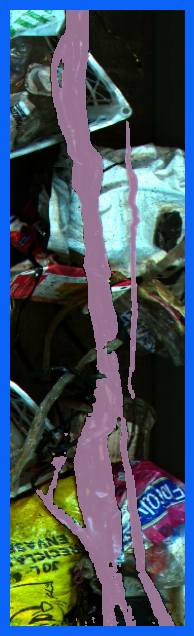

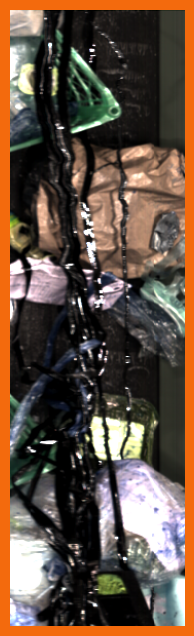

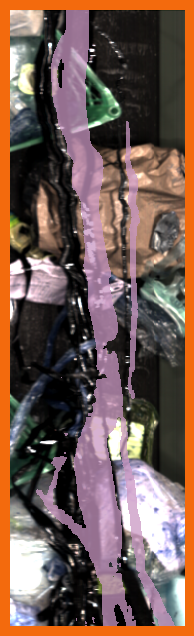

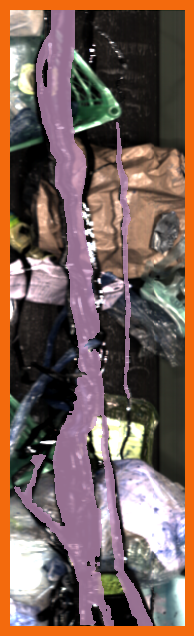

In [14]:
offset = 400
offsetr = 570

rgb_crop = rgb_align[:, offset:offsetr]
mask_crop = mask_align[:, offset:offsetr]
hyper_align_color_crop = hyper_align_color[:, offset:offsetr]
transferred_mask_crop = transferred_mask[:, offset:offsetr]

mask_color = np.zeros(rgb_crop.shape[:2] + (4,), dtype=np.uint8)
mask_color[mask_crop] = [202, 152, 195, 190]

transferred_mask_color = np.zeros(rgb_crop.shape[:2] + (4,), dtype=np.uint8)
transferred_mask_color[transferred_mask_crop] = [202, 152, 195, 190]

plt.figure(figsize=(8, 8))
plt.imshow(rgb_crop)
plt.imshow(mask_color, interpolation='nearest')
plt.gca().patch.set_edgecolor('#0b63f8')
plt.gca().patch.set_linewidth(20)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(8, 8))
plt.imshow(hyper_align_color_crop)
plt.gca().patch.set_edgecolor('#f36a0d')
plt.gca().patch.set_linewidth(20)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(8, 8))
plt.imshow(hyper_align_color_crop)
plt.imshow(mask_color, interpolation='nearest')
plt.gca().patch.set_edgecolor('#f36a0d')
plt.gca().patch.set_linewidth(20)
plt.xticks([])
plt.yticks([])

plt.figure(figsize=(8, 8))
plt.imshow(hyper_align_color_crop)
plt.imshow(transferred_mask_color, interpolation='nearest')
plt.gca().patch.set_edgecolor('#f36a0d')
plt.gca().patch.set_linewidth(20)
plt.xticks([])
plt.yticks([])

(-0.5, 169.5, 599.5, -0.5)

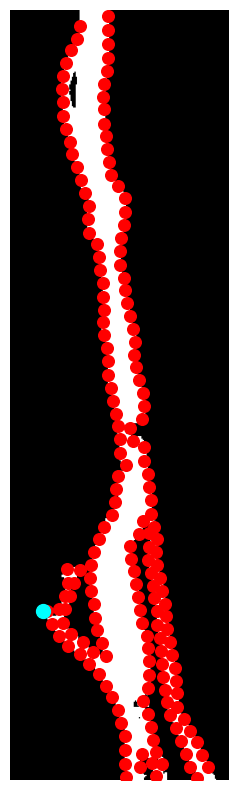

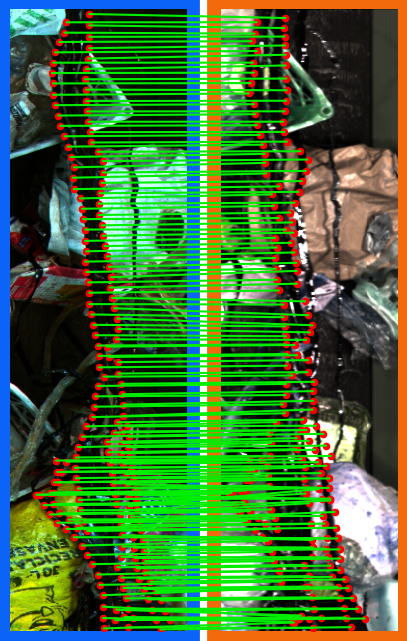

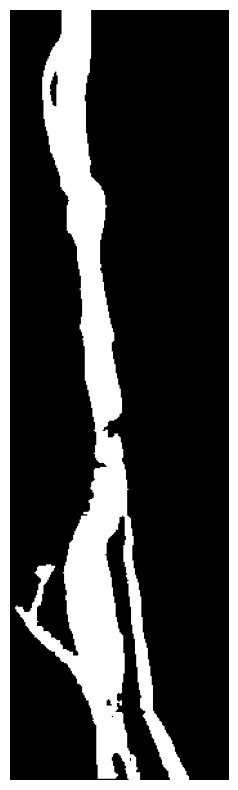

In [15]:
# Plot component data
comp_idx = 0
comp_extra = extra[comp_idx]

# Points
plt.figure(figsize=(10, 10))
plt.imshow(comp_extra['component_mask'][:, offset:offsetr], cmap='grey')
plt.scatter(comp_extra['points'][:, 0] - offset, comp_extra['points'][:, 1], c='#f00', s=70)
plt.scatter(comp_extra['points_extra']['outermost_points'][:, 0] - offset, comp_extra['points_extra']['outermost_points'][:, 1], c='#0ff', s=100)
plt.axis('off')

# Correspondences
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 10))
fig.subplots_adjust(wspace=0.2)

xy1 = (comp_extra['corrs'][:, 0] - offset, comp_extra['corrs'][:, 1])
xy2 = (comp_extra['corrs'][:, 2] - offset, comp_extra['corrs'][:, 3])

ax1.imshow(rgb_crop)
ax1.scatter(*xy1, s=20, c='#f00')
ax1.patch.set_edgecolor('#0b63f8')
ax1.patch.set_linewidth(20)
ax1.set_xticks([])
ax1.set_yticks([])

ax2.imshow(hyper_align_color_crop)
ax2.scatter(*xy2, s=20, c='#f00')
ax2.patch.set_edgecolor('#f36a0d')
ax2.patch.set_linewidth(20)
ax2.set_xticks([])
ax2.set_yticks([])

# Draw lines
for i in range(xy1[0].shape[0]):
    con = matplotlib.patches.ConnectionPatch(xyA=(xy1[0][i], xy1[1][i]), xyB=(xy2[0][i], xy2[1][i]),
                                             coordsA='data', coordsB='data', axesA=ax1, axesB=ax2, color='#0e0', linewidth=1.5)
    ax2.add_artist(con)

plt.figure(figsize=(10, 10))
plt.imshow(comp_extra['transformed_mask'][:, offset:offsetr], cmap='grey')
plt.axis('off')